# 베이지안 회귀 분석 예제

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pymc3 as pm
import numpy as np
np.random.seed(1000)
import matplotlib as mpl
import matplotlib.pyplot as plt

## 단순 선형 회귀 

* `np.polyfit` 명령으로 단순 선형 회귀 가능

In [3]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

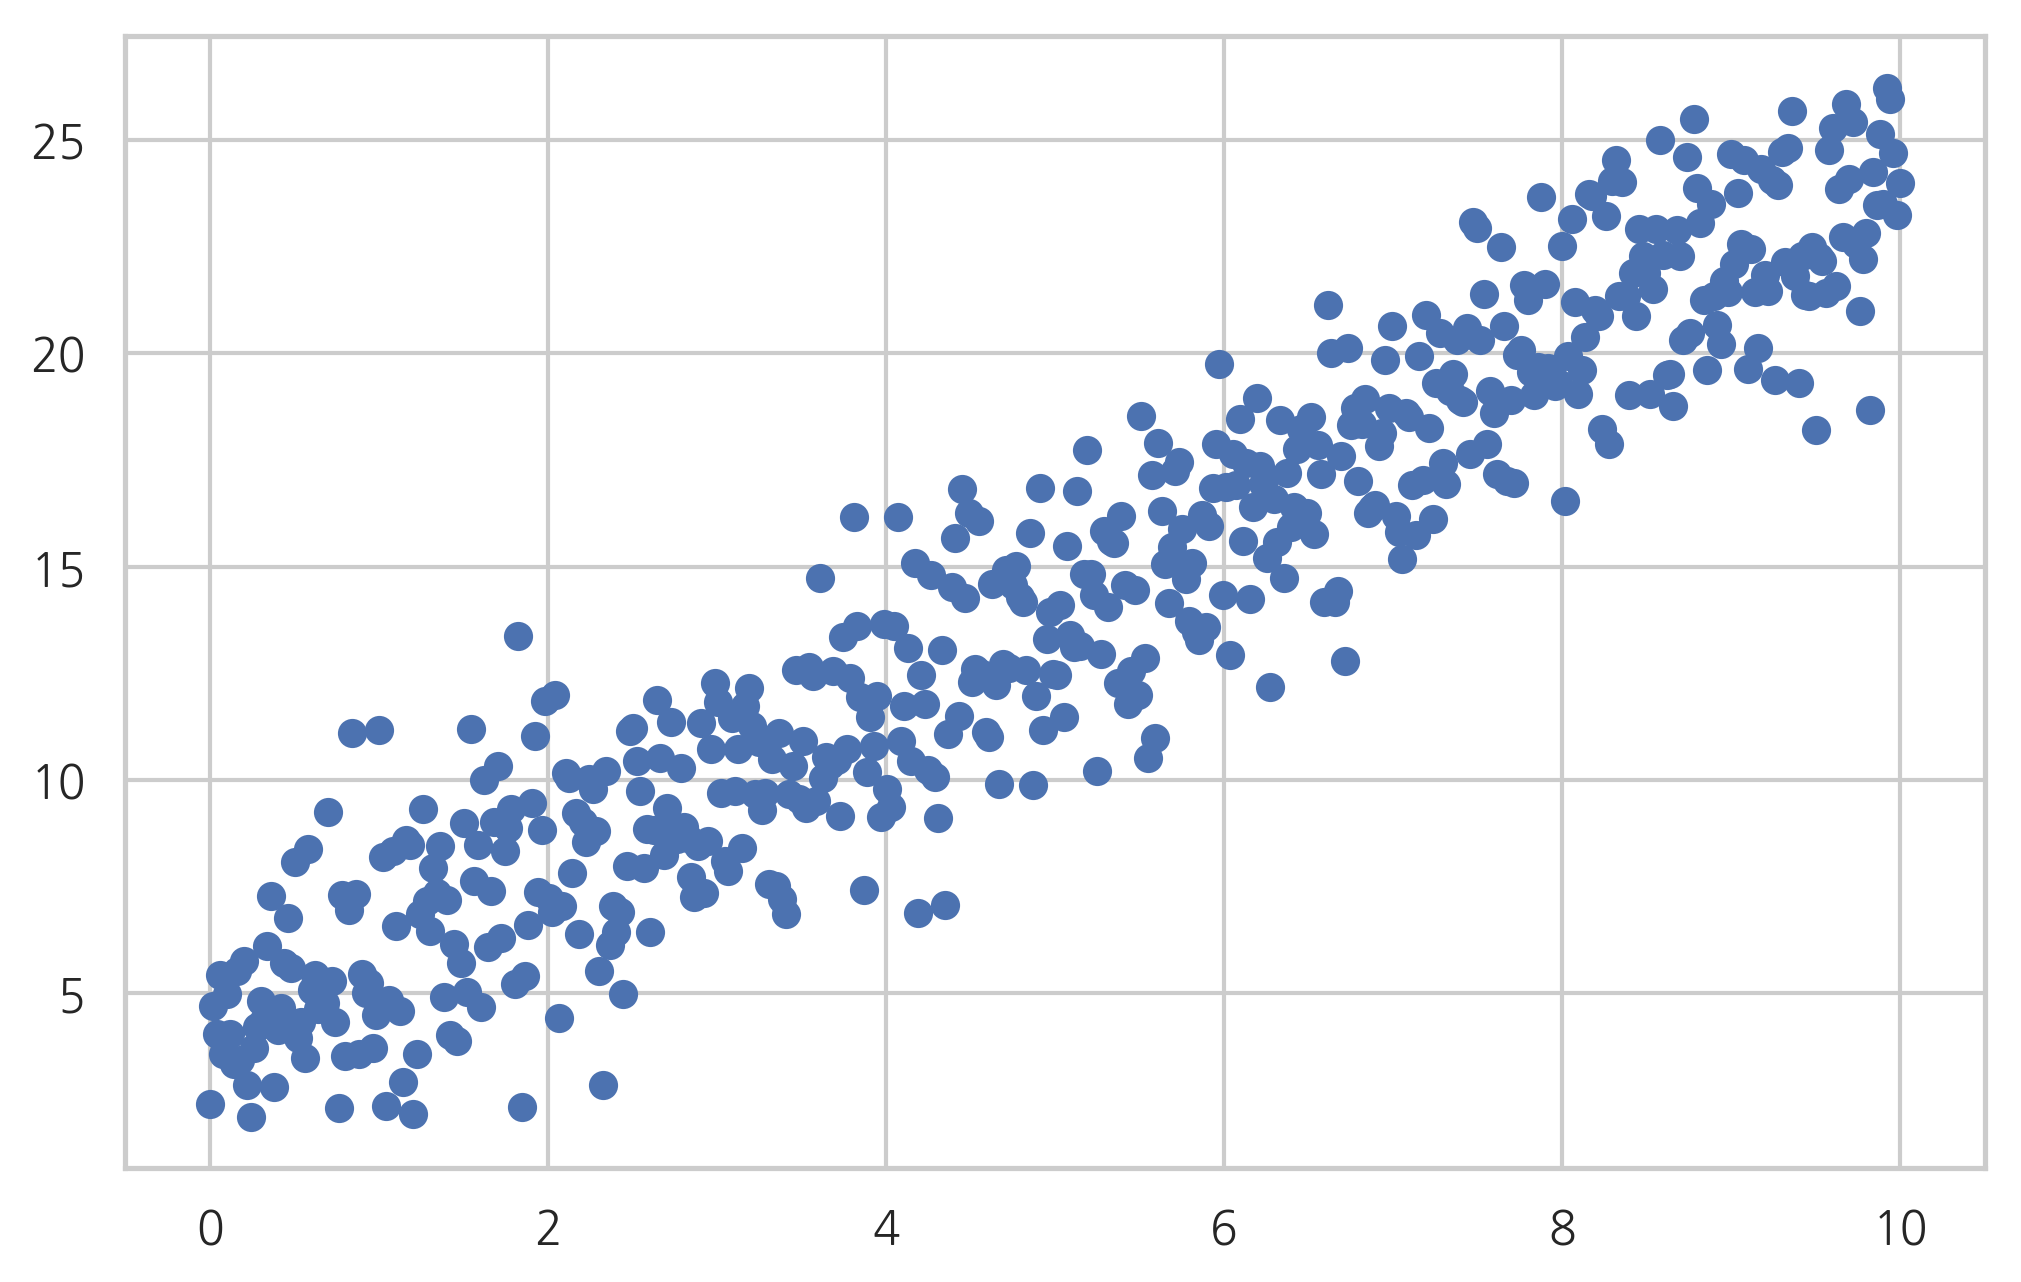

In [4]:
plt.scatter(x, y)
plt.show()

In [5]:
reg = np.polyfit(x, y, 1)
reg

array([2.03384161, 3.77649234])

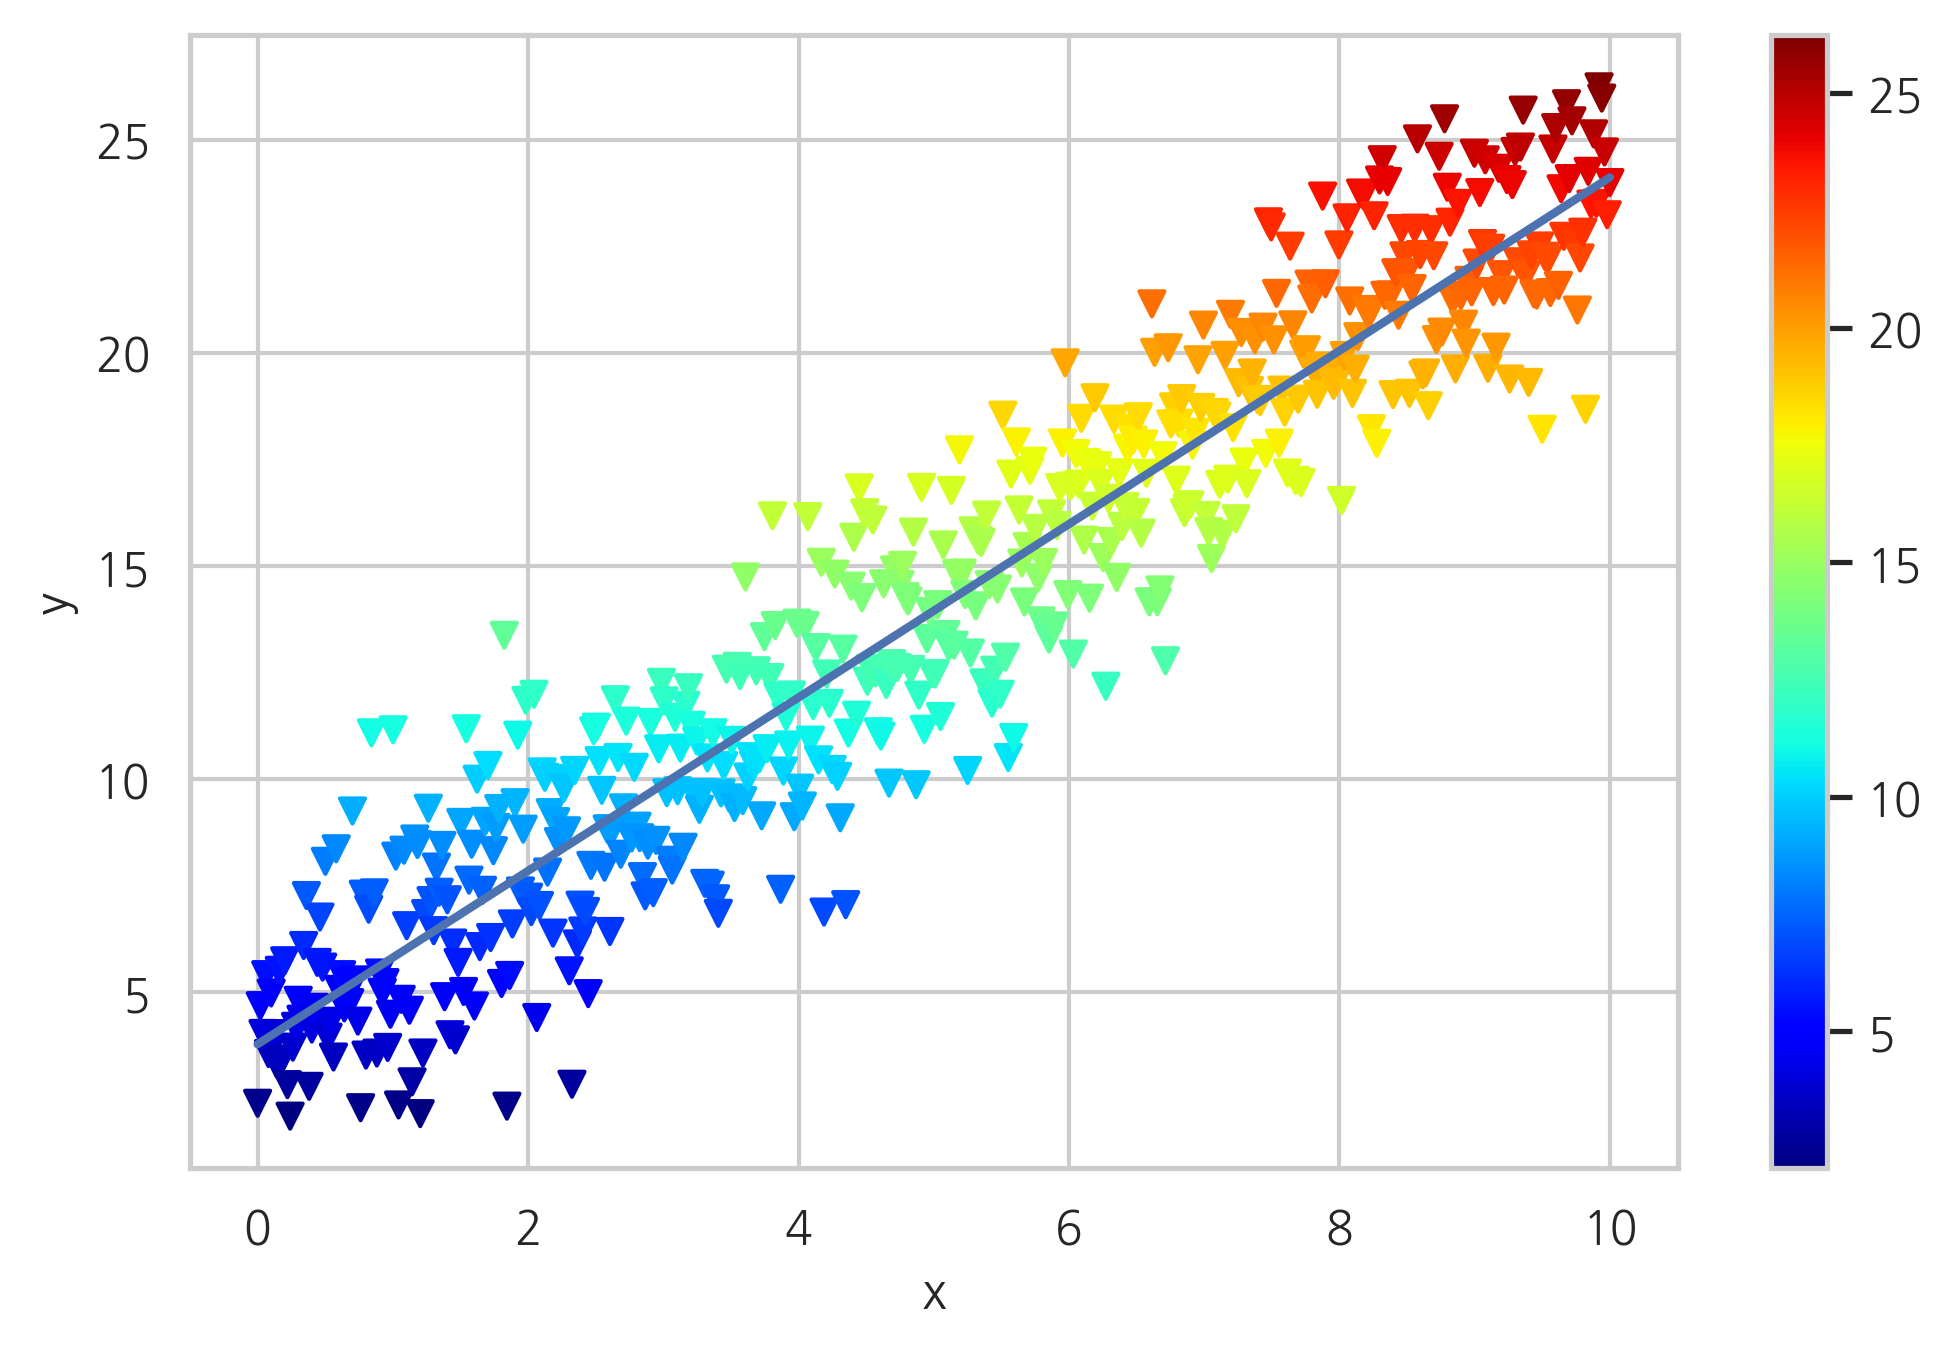

In [6]:
plt.scatter(x, y, c=y, marker='v', cmap=mpl.cm.jet)
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 베이지안 회귀

In [7]:
with pm.Model() as model: 
    # PyMC3의 모형은 with 문 안에서 사용된다.
    # 사전 확률 정의
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # 선형 회귀 모형 정의
    y_est = alpha + beta * x
    
    # 가능도 분포 정의 
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # 최적화를 사용하여 시작값 추정
    start = pm.find_MAP()
 
    # NUTS MCMC 샘플링 알고리즘 인스턴스 생성
    step = pm.NUTS(scaling=start)
    
    # 샘플링을 사용하여 100개의 사후 샘플 생성
    trace = pm.sampling.sample(100, step=step, start=start, progressbar=False)
    

logp = -1,068.5, ||grad|| = 60.625: 100%|██████████| 28/28 [00:00<00:00, 1040.77it/s]  
Only 100 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


In [8]:
trace[0]

{'alpha': 3.7809674403284026,
 'beta': 2.0348240447962915,
 'sigma_interval__': -1.3284519594128563,
 'sigma': 2.0941554456646196}

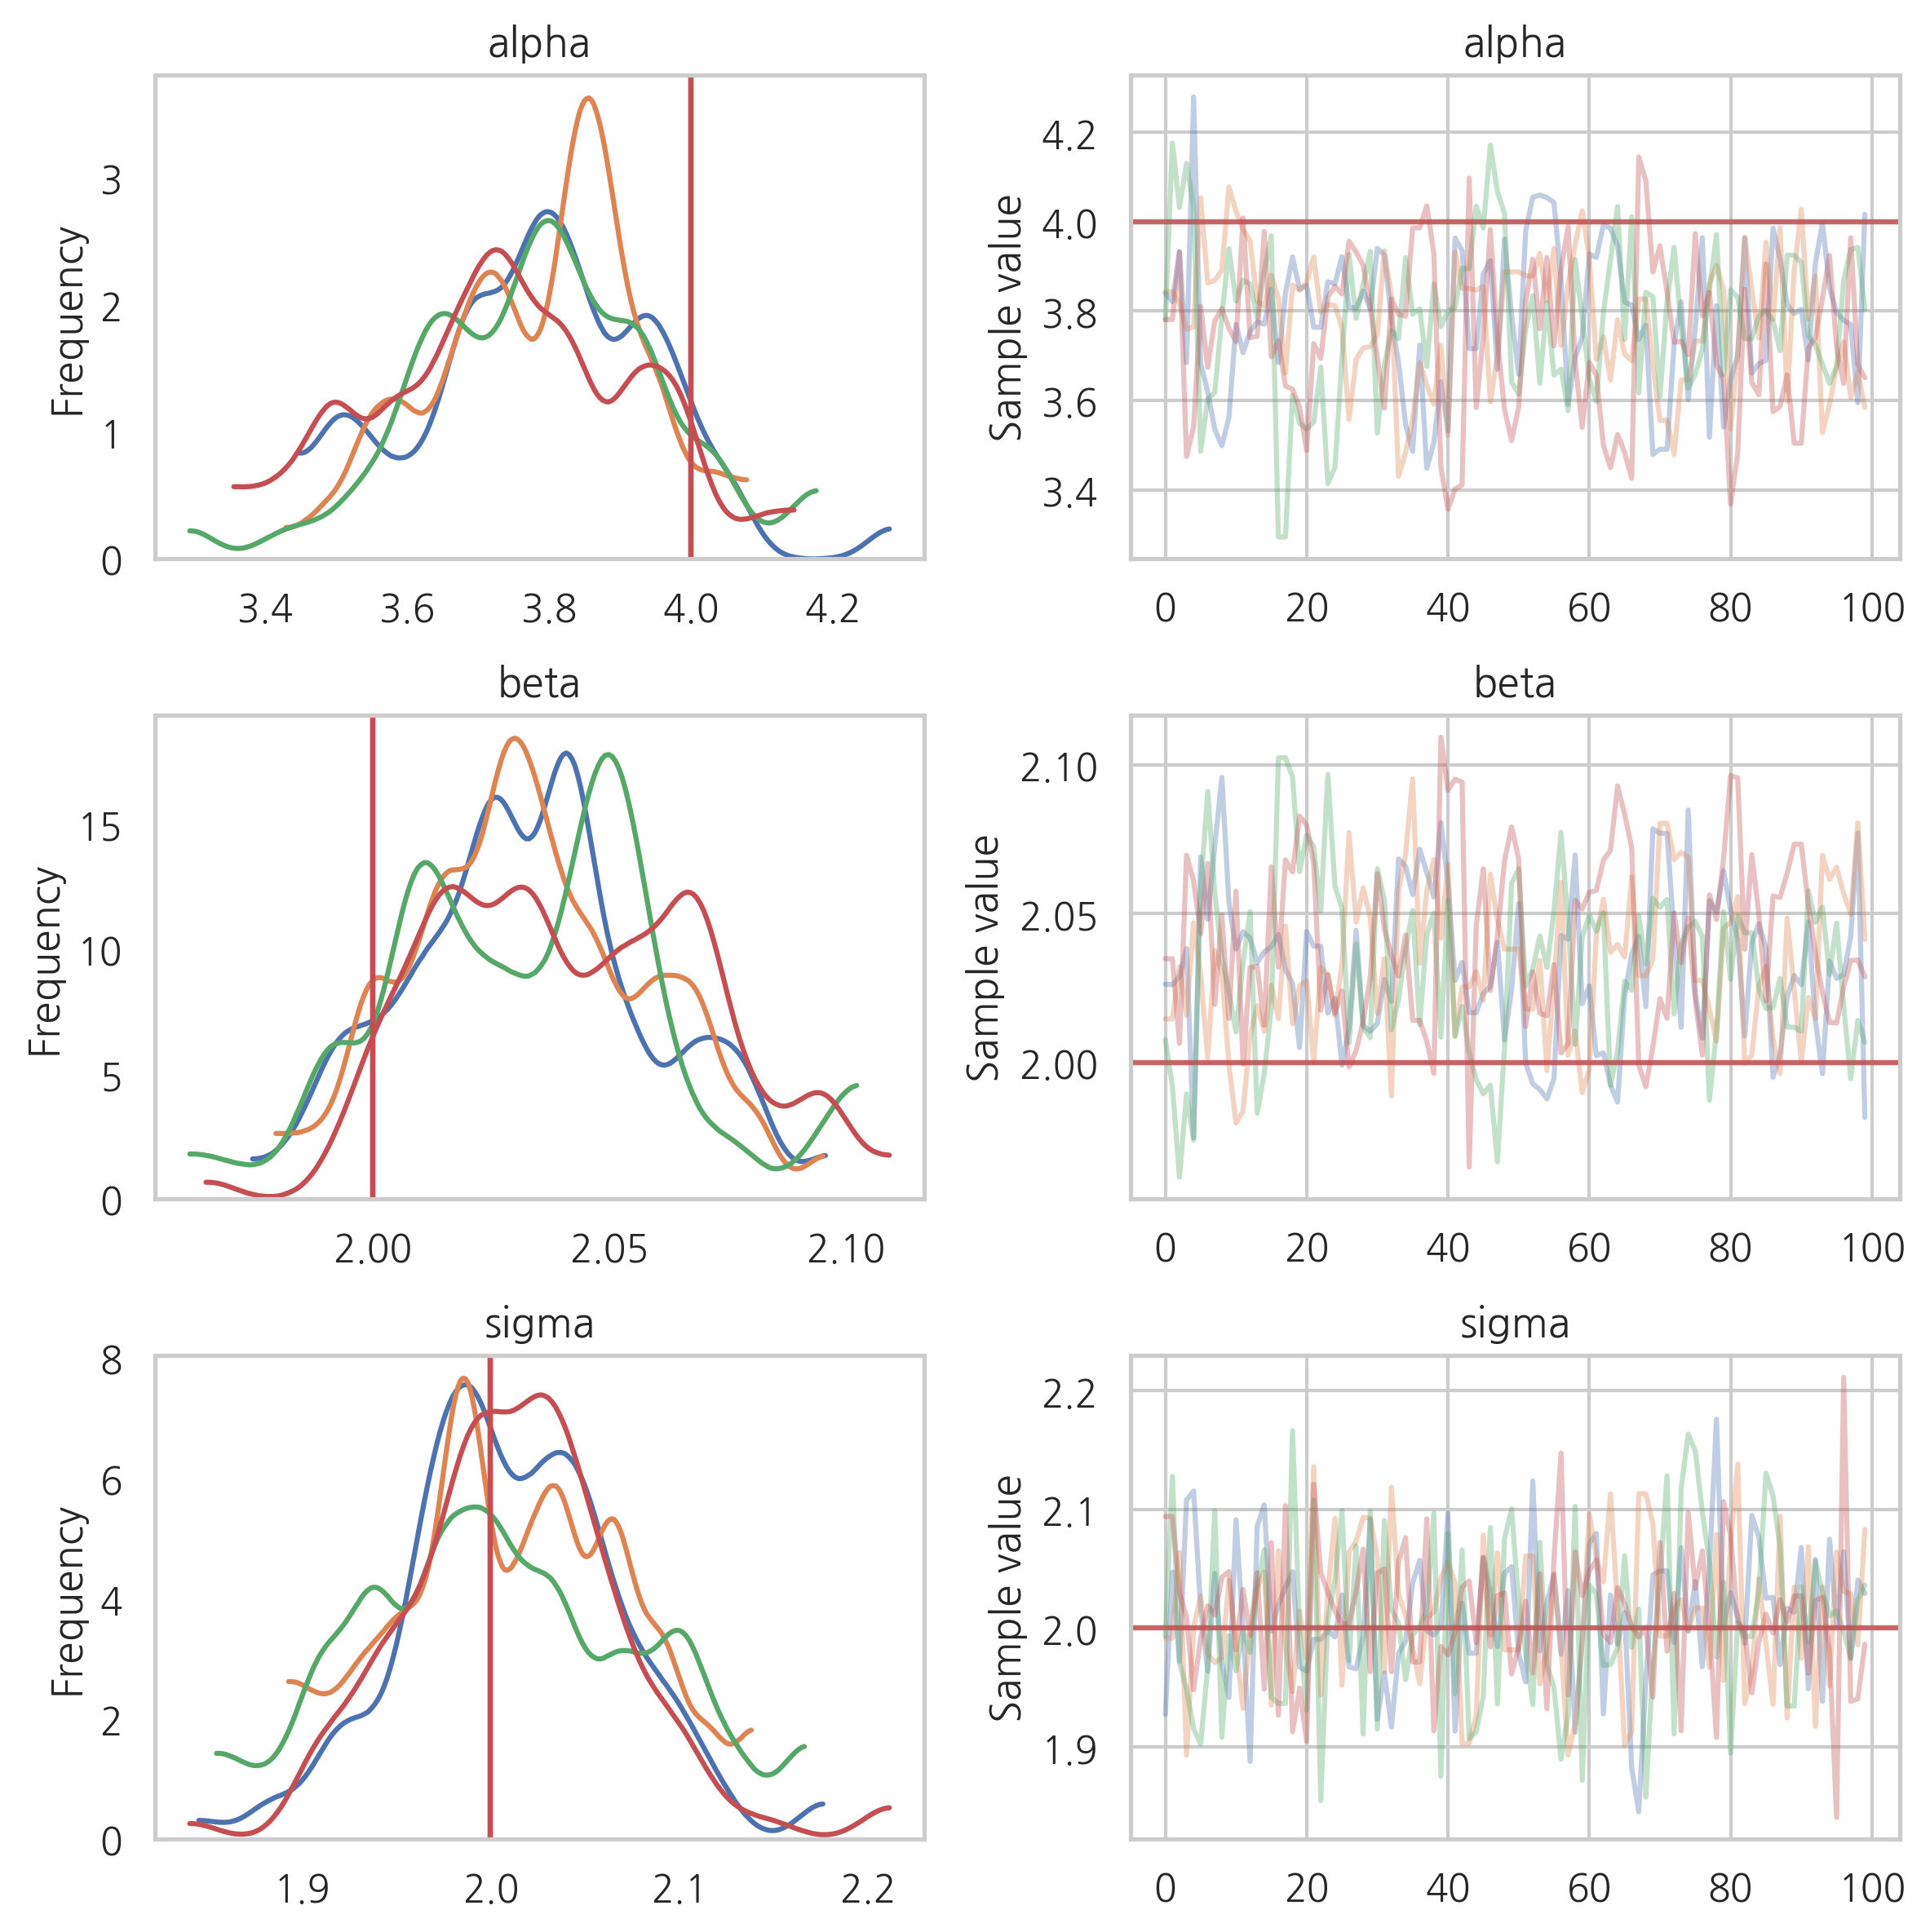

In [9]:
pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2}, figsize=(8, 8))
plt.show()

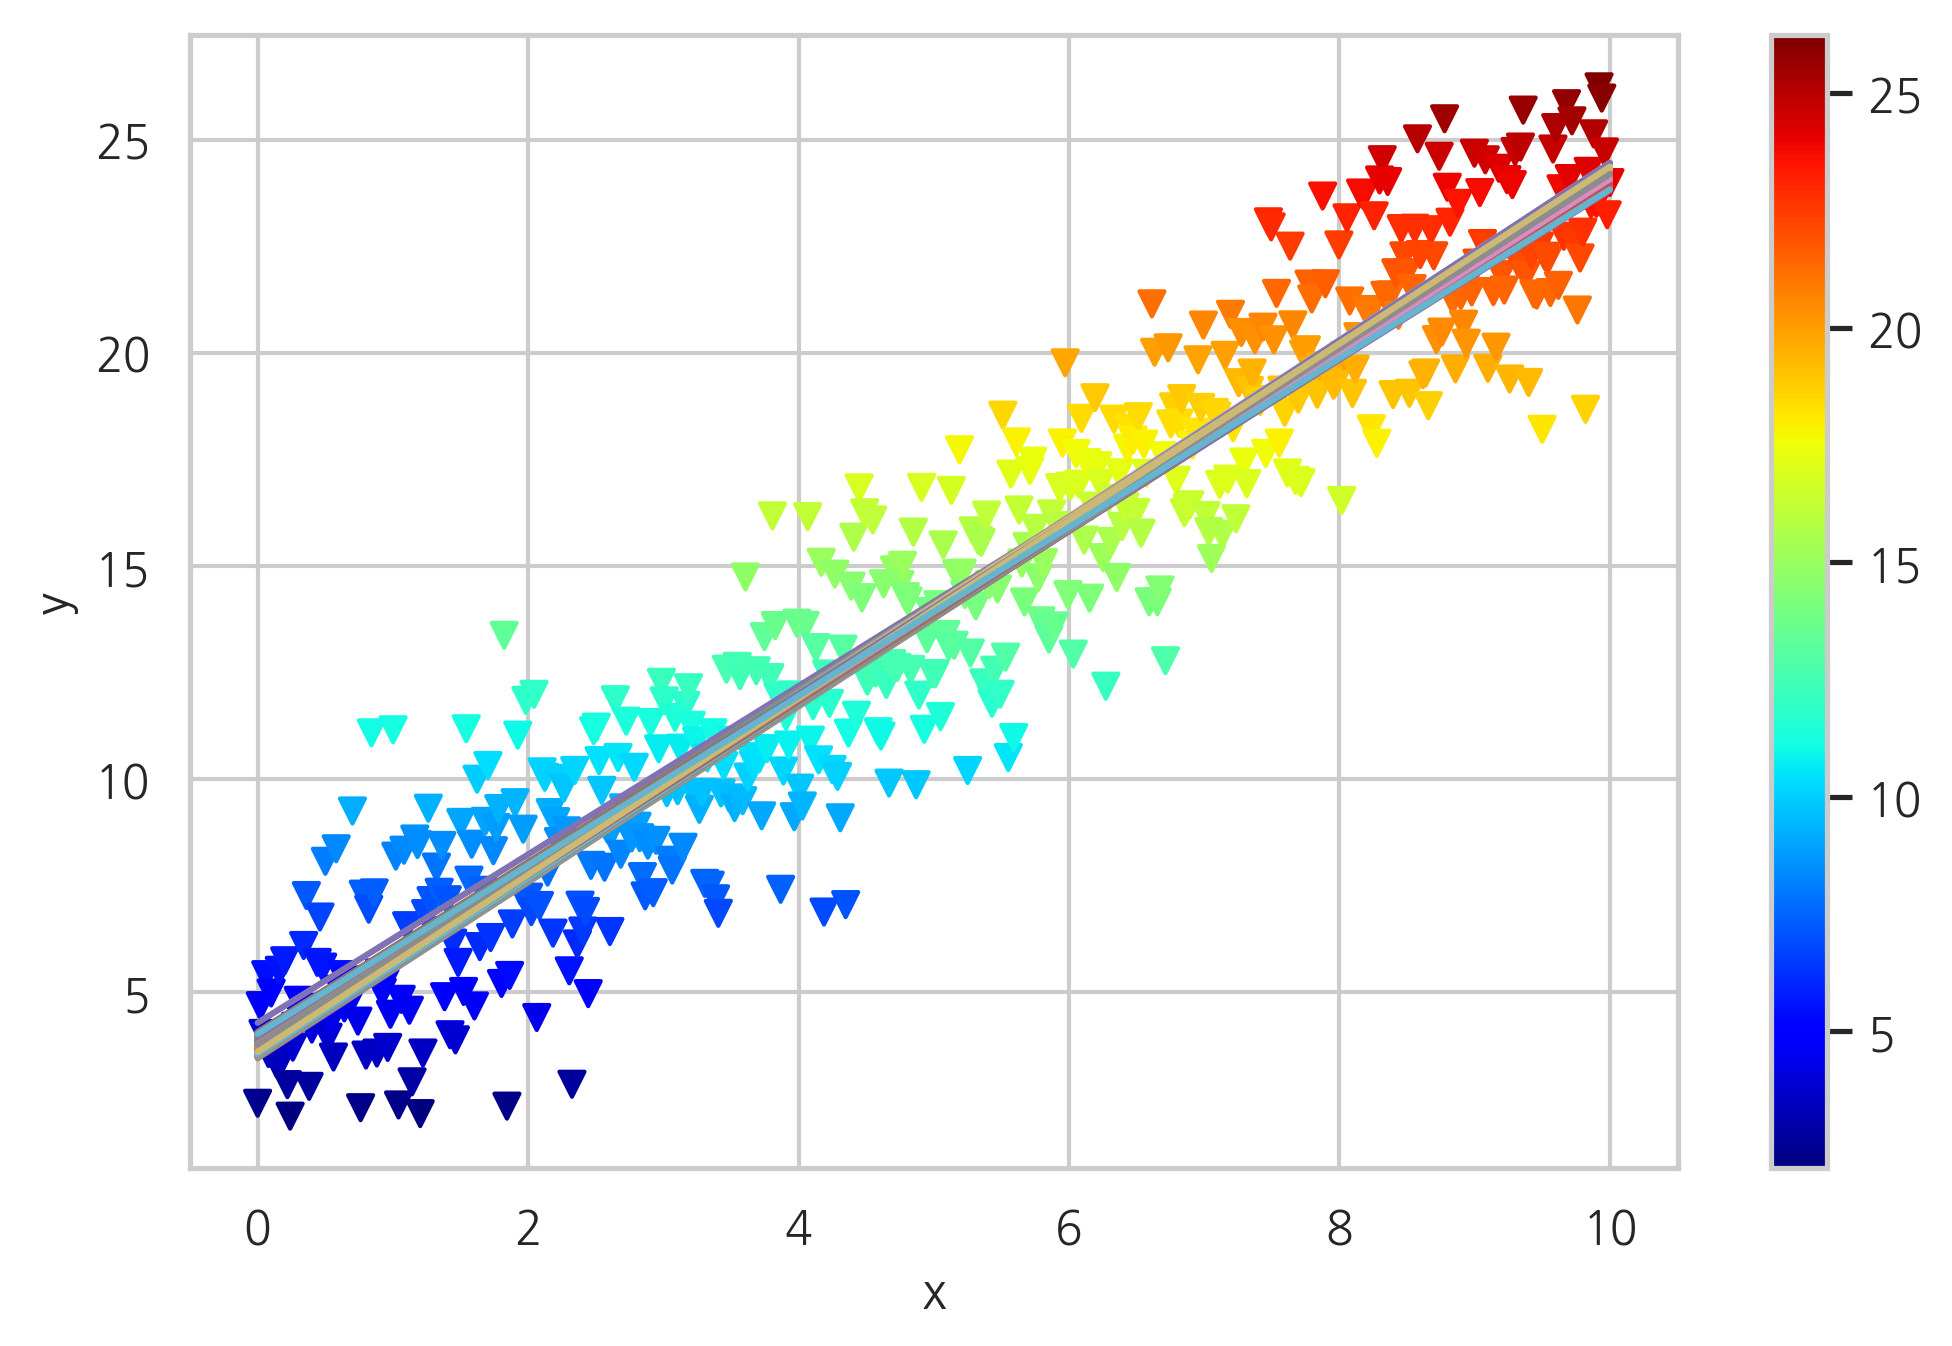

In [10]:
plt.scatter(x, y, c=y, marker='v', cmap=mpl.cm.jet)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)